Importing Packages


In [ ]:
import numpy as np #matematis
import pandas as pd #dataset
import matplotlib.pyplot as plt #visual
import seaborn as sns #visual
from sklearn.preprocessing import LabelEncoder #encoding
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, classification_report, confusion_matrix #classification report
from sklearn.tree import DecisionTreeClassifier #modeldecisiontree
from sklearn import metrics #metrics
from sklearn.ensemble import RandomForestClassifier #modelrandomforest
from imblearn.over_sampling import SMOTE #balancingdata

Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filename = '/content/drive/MyDrive/diabetes_prediction_dataset.csv'
data=pd.read_csv(filename)

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
data.isnull().sum()


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

EDA

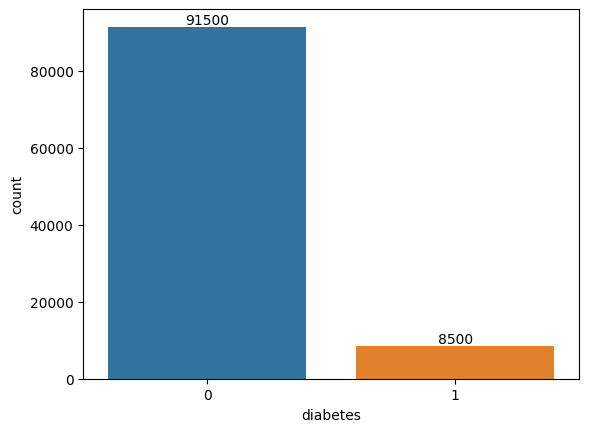

In [ ]:
d = sns.countplot(x='diabetes', data=data)
for container in d.containers:
    d.bar_label(container)

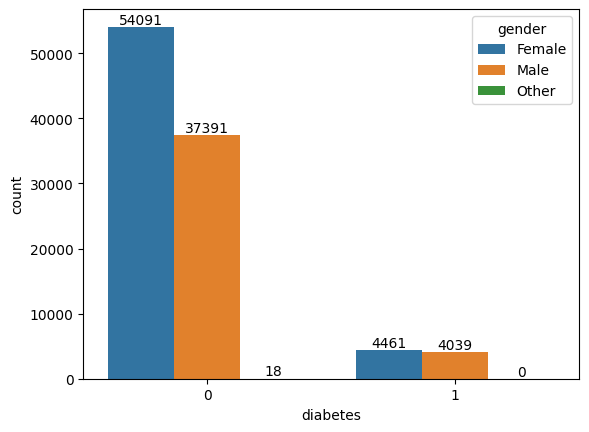

In [ ]:
g = sns.countplot(x='diabetes', hue='gender', data=data)
for container in g.containers:
    g.bar_label(container)

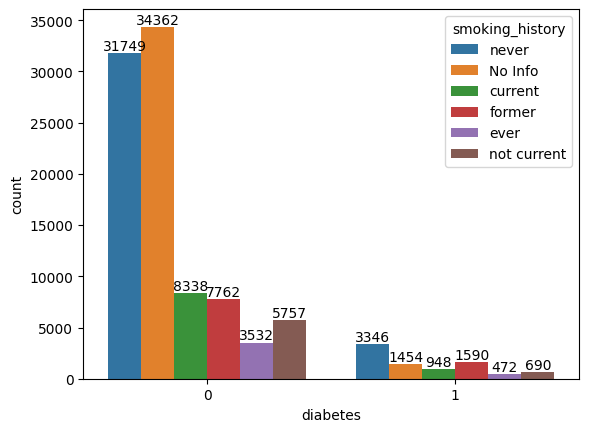

In [ ]:
s = sns.countplot(x='diabetes', hue='smoking_history', data=data)
for container in s.containers:
    s.bar_label(container)

<ipython-input-10-012317bf15f0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

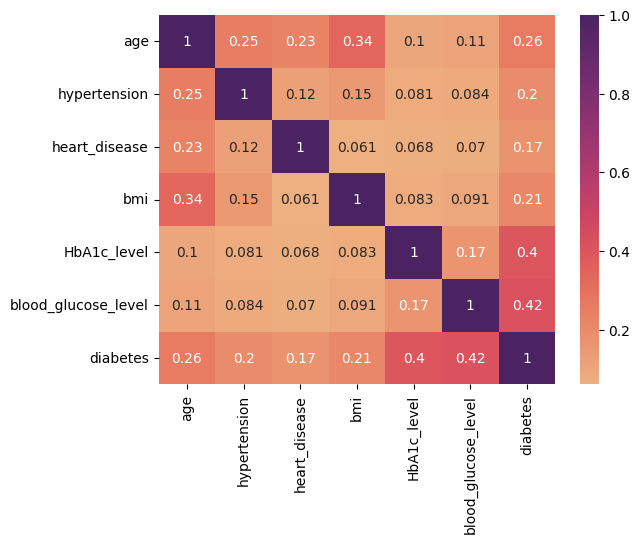

In [ ]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='flare')

ENCODE LABEL

In [ ]:
data[["gender", "smoking_history"]] = data[["gender", "smoking_history"]].apply(LabelEncoder().fit_transform)

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


Split Data 

In [ ]:
X = data.drop("diabetes", axis = 1)
Y = data.diabetes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

Decision Tree Classifier

In [ ]:
#training model
model_DT = DecisionTreeClassifier()
print(model_DT.get_params())

#fitting model
model_DT.fit(X_train, y_train)

#testing model
DT_y_pred = model_DT.predict(X_test)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


Text(0.5, 427.9555555555555, 'Predicted label')

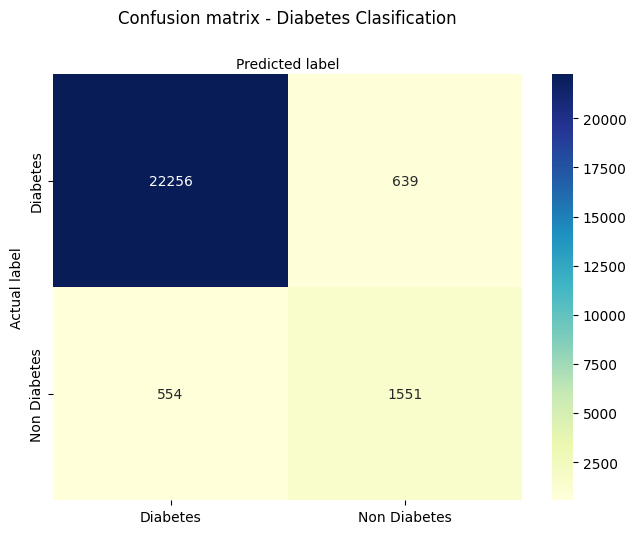

In [ ]:
model_DT_matrix = metrics.confusion_matrix(y_test, DT_y_pred)

class_names=['Diabetes','Non Diabetes'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(model_DT_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Diabetes Clasification', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
DT = classification_report(y_test, DT_y_pred)
print(DT)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     22895
           1       0.71      0.74      0.72      2105

    accuracy                           0.95     25000
   macro avg       0.84      0.85      0.85     25000
weighted avg       0.95      0.95      0.95     25000



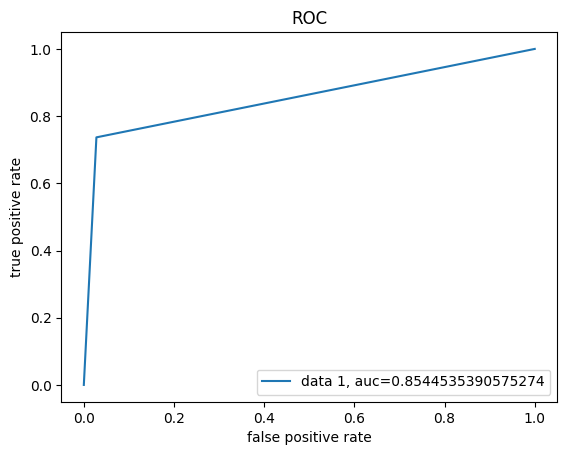

In [ ]:
DT_fpr, DT_tpr, DT_ = metrics.roc_curve(y_test, DT_y_pred)
DT_auc = metrics.roc_auc_score(y_test, DT_y_pred)

plt.plot(DT_fpr, DT_tpr, label="data 1, auc="+str(DT_auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

Handling Imbalanced Data using SMOTE

In [ ]:
sm = SMOTE(random_state=2)
x_smote,y_smote = sm.fit_resample(X,Y)

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=42)

In [ ]:
#training model
model_DT_smote = DecisionTreeClassifier()
print(model_DT_smote.get_params())

#fitting model
model_DT_smote.fit(X1_train, y1_train)

#testing model
DT_y1_pred = model_DT_smote.predict(X1_test)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


[[22095   716]
 [  606 22333]]


Text(0.5, 427.9555555555555, 'Predicted label')

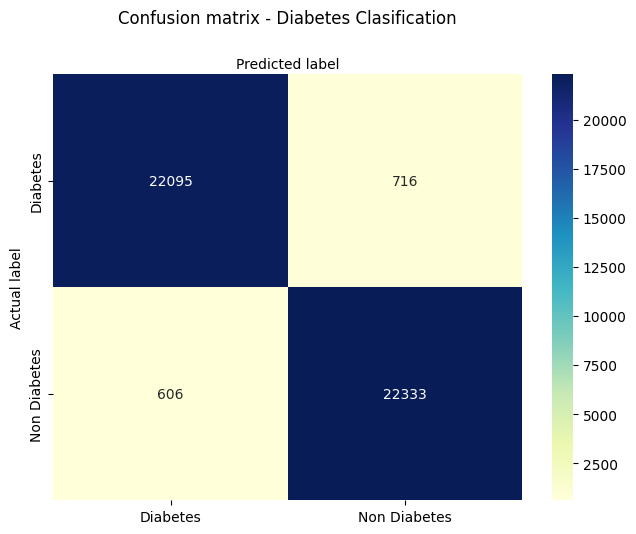

In [ ]:
model_DT_smote_matrix = metrics.confusion_matrix(y1_test, DT_y1_pred)
print(model_DT_smote_matrix)

class_names=['Diabetes','Non Diabetes'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(model_DT_smote_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Diabetes Clasification', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
DT_smote = classification_report(y1_test, DT_y1_pred)
print(DT_smote)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     22811
           1       0.97      0.97      0.97     22939

    accuracy                           0.97     45750
   macro avg       0.97      0.97      0.97     45750
weighted avg       0.97      0.97      0.97     45750



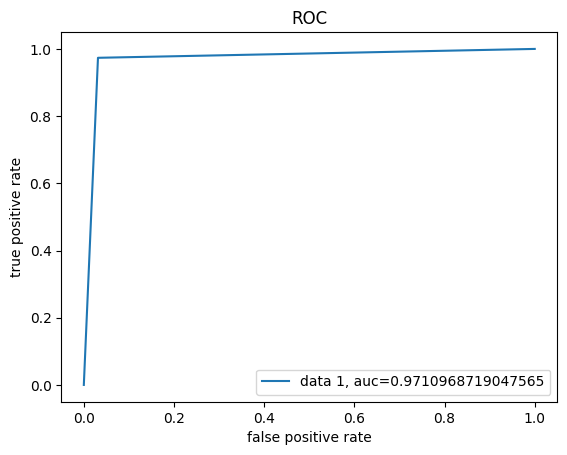

In [ ]:
DT_smote_fpr, DT_smote_tpr, DT_smote_ = metrics.roc_curve(y1_test, DT_y1_pred)
DT_smote_auc = metrics.roc_auc_score(y1_test, DT_y1_pred)

plt.plot(DT_smote_fpr, DT_smote_tpr, label="data 1, auc="+str(DT_smote_auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

Random Forest Classifier

In [ ]:
#training model
model_RF = RandomForestClassifier()
print(model_RF.get_params())

#fitting model
model_RF.fit(X_train, y_train)

#testing model
RF_y_pred = model_RF.predict(X_test)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


[[22825    70]
 [  661  1444]]


Text(0.5, 427.9555555555555, 'Predicted label')

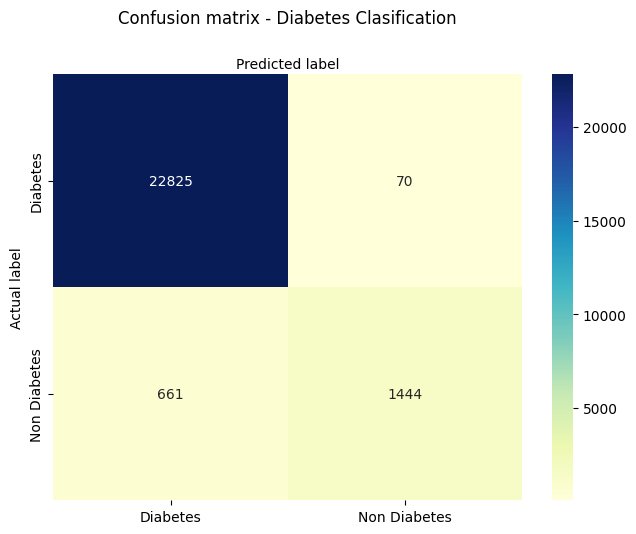

In [ ]:
model_RF_matrix = metrics.confusion_matrix(y_test, RF_y_pred)
print(model_RF_matrix)

class_names=['Diabetes','Non Diabetes'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(model_RF_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Diabetes Clasification', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
RF = classification_report(y_test, RF_y_pred)
print(RF)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22895
           1       0.95      0.69      0.80      2105

    accuracy                           0.97     25000
   macro avg       0.96      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000



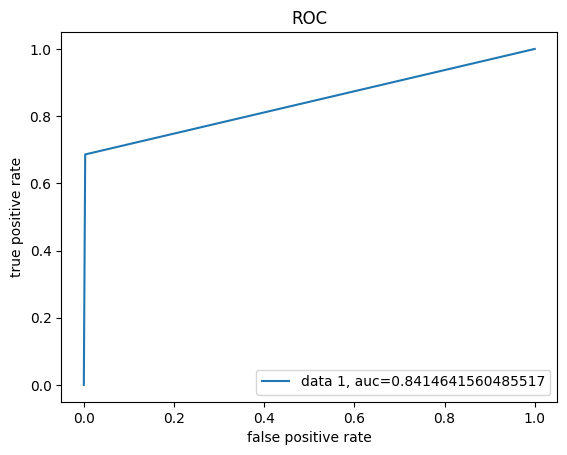

In [ ]:
RF_fpr, RF_tpr, RF_ = metrics.roc_curve(y_test, RF_y_pred)
RF_auc = metrics.roc_auc_score(y_test, RF_y_pred)

plt.plot(RF_fpr, RF_tpr, label="data 1, auc="+str(RF_auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

SMOTE for Random Forest model

In [ ]:
#training model
model_RF_smote = RandomForestClassifier()
print(model_RF_smote.get_params())

#fitting model
model_RF_smote.fit(X1_train, y1_train)

#testing model
RF_y1_pred = model_RF_smote.predict(X1_test)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


[[22247   564]
 [  579 22360]]


Text(0.5, 427.9555555555555, 'Predicted label')

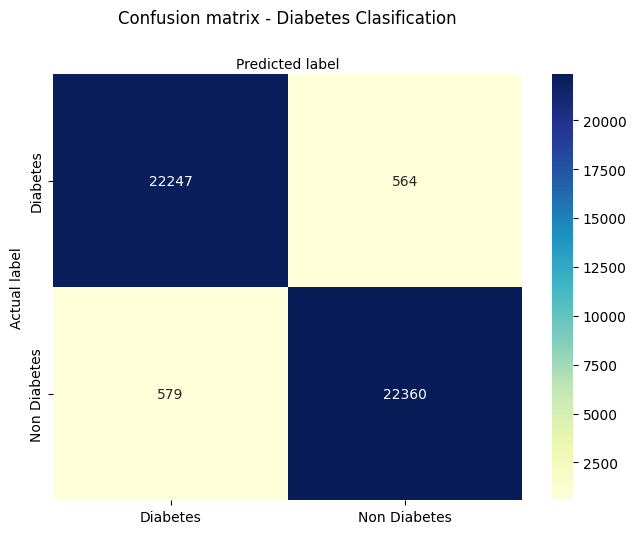

In [ ]:
model_RF_smote_matrix = metrics.confusion_matrix(y1_test, RF_y1_pred)
print(model_RF_smote_matrix)

class_names=['Diabetes','Non Diabetes'] # name  of classes
fig, ax = plt.subplots()

# heatmap
sns.heatmap(pd.DataFrame(model_RF_smote_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix - Diabetes Clasification', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
RF_smote = classification_report(y1_test, RF_y1_pred)
print(RF_smote)

              precision    recall  f1-score   support

           0       0.97      0.98      0.97     22811
           1       0.98      0.97      0.98     22939

    accuracy                           0.98     45750
   macro avg       0.98      0.98      0.98     45750
weighted avg       0.98      0.98      0.98     45750



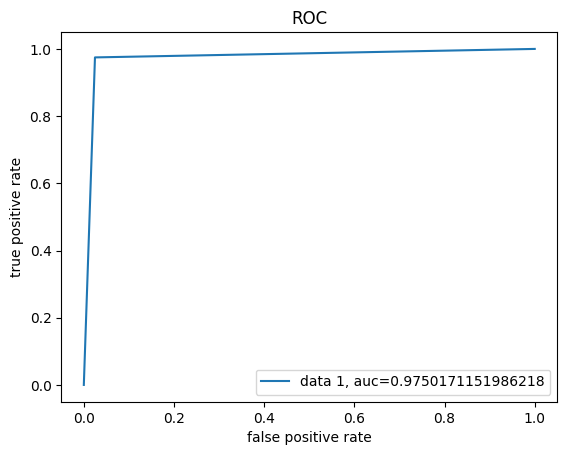

In [ ]:
RF_smote_fpr, RF_smote_tpr, RF_smote_ = metrics.roc_curve(y1_test, RF_y1_pred)
RF_smote_auc = metrics.roc_auc_score(y1_test, RF_y1_pred)

plt.plot(RF_smote_fpr, RF_smote_tpr, label="data 1, auc="+str(RF_smote_auc))
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC')
plt.legend(loc=4)
plt.show()

Conclusion

Dalam menentukan ukuran kebaikan model, seringkali parameter yang digunakan adalah dengan membandingkan nilai akurasi. Model dengan nilai akurasi tertinggi (mendekati 1) dinobatkan sebagai model terbaik. Namun, dalam kasus diabetes ini, data yang dimiliki bersifat tidak seimbang, dengan kasus diabetes -yang justru ingin kita teliti- memiliki jumlah data yang lebih sedikit (9%) dibandingkan dengan data pasien tidak diabetes. Maka dari itu, ukuran recall atau sensitivitas perlu diperhatikan, karena seringkali pada kasus data tidak seimbang, akurasi yang dihasilkan tinggi namun model kurang sensitif. Hal ini tentu saja disebabkan karena model cenderung mempelajari satu kondisi (data yang lebih banyak) dibandingkan kondisi lainnya. Selain itu nilai F1-Skor dan ROC pun dinilai lebih objektif untuk menentukan model terbaik dibandingkan dengan akurasi.

Salah satu cara yang paling mudah serta populer dalam mengatasi masalah data tidak seimbang adalah dengan melakukan *resampling*. Metode ini terbagi ke dalam dua bagian, yaitu *Under sampling* dan *Over sampling*. Metode *Under Sampling* mengambil data di kelas mayoritas (kelas dengan data yang lebih banyak) secara acak sebanyak jumlah kelas minoritas, sehingga total keseluruhan data menjadi seimbang, namun metode ini berpotensi menghilangkan data-data yang penting, sehingga model menjadi kurang akurat. Metode *Over Sampling* menduplikasi data di kelas minoritas secara acak sebanyak jumlah kelas mayoritas, sehingga total keseluruhan pun menjadi seimbang. Kelemahan metode ini adalah model cenderung mengalami *over-fitting* karena data yang dipelajari sama. SMOTE merupakan pengembangan dari metode *Over Sampling* yang dinilai lebih baik. Metode ini memperbanyak data (*Over Sampling*) pada kelas minoritas bukan dengan menduplikasi  tetapi dengan membangkitkan data sintesis dengan pendekatan KNN.

Berikut rekapitulasi ukuran kebaikan model pada data tidak seimbang dan data yang telah diseimbangkan:

1. Decision Tree -  Imbalanced
  * Accuracy: 95%
  * Recall: 85%
  * F1 Score: 85%
  * ROC: 85%

2. Decision Tree - Balanced
  * Accuracy: 97%
  * Recall: 97%
  * F1 Score: 97%
  * ROC: 97%

3. Random Forest - Imbalanced
  * Accuracy: 97%
  * Recall: 84%
  * F1 Score: 89%
  * ROC: 84%

4. Random Forest - Balanced  
  * Accuracy: 98%
  * Recall: 98%
  * F1 Score: 98%
  * ROC: 97%

Model Random Forest merupakan pengembangan dari model Decision Tree. Jika Decision Tree hanya memiliki satu pohon, maka Random Forest merupakan kumpulan dari banyak pohon, lalu akan dipilih pohon terbaik. Dari hasil ukuran kebaikan data, terlihat bahwa model Random Forest telah menghasilkan akurasi yang lebih baik dibandingkan dengan model Decision Tree meskipun data masih tidak seimbang. Setelah data diseimbangkan dengan metode SMOTE, kedua model menghasilkan nilai yang lebih baik.